In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
dataset = datasets.load_breast_cancer()
dataset.target.shape

(569,)

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset.data,dataset.target,test_size = 0.2,random_state = 0)

In [4]:
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [5]:
clf.score(X_train,Y_train)

0.9384615384615385

In [6]:
clf.score(X_test,Y_test)

0.9649122807017544

In [7]:
def train(X,Y):
    return

def predict_one(X_train,Y_train,x_test,k):
    distances = []
    for i in range(len(X_train)):
        distance = ((X_train[i,:] - x_test)**2).sum()
        distances.append([distance,i])
        
    distances = sorted(distances)
    targets = []
    for i in range(k):
        targets.append(Y_train[distances[i][1]])
        
    return Counter(targets).most_common(1)[0][0]

def predict(X_train,Y_train,X_test_data,k):
    predictions = []
    for x_test in X_test_data:
        predictions.append(predict_one(X_train,Y_train,x_test,k))
    return predictions

In [8]:
Y_pred = predict(X_train,Y_train,X_test,11)
accuracy_score(Y_test,Y_pred)

0.9649122807017544

In [9]:
x_axis = []
y_axis = []
for i in range(1,25,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf,X_train,Y_train,cv=KFold(3,False,0))
    x_axis.append(i)
    y_axis.append(score.mean())

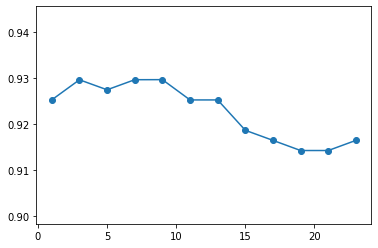

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y_axis)
plt.show()

In [11]:
y_axis[4]

0.9296793307772743

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
iris = datasets.load_iris()
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 0)

In [14]:
clf = LinearRegression()
cross_val_score(clf,iris.data,iris.target,cv=KFold(3,True,0))

array([0.90322728, 0.92527008, 0.94214064])